# Lösungen

## Python-Pakete

In [26]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Aufgabe 1: Listen, Datentypen

1. Erstellen Sie ein Liste mit den Einträgen 123, "Fahrrad", True, 3.14 und "Bob".
2. Fügen Sie der Liste zwei weitere Einträge am Ende an.
3. Verwenden Sie eine for-Schleife und formatiertes Drucken, um jeden Eintrag der Liste und seinen Datentyp auszugeben.

### Lösung

In [2]:
my_list = [123, "Fahrrad", True, 3.14, "Bob"]
my_list.append('Alice')
my_list.append(42)

In [3]:
for item in my_list:
    print(f"Der Eintrag {item} ist vom Datentyp {type(item)}.")

Der Eintrag 123 ist vom Datentyp <class 'int'>.
Der Eintrag Fahrrad ist vom Datentyp <class 'str'>.
Der Eintrag True ist vom Datentyp <class 'bool'>.
Der Eintrag 3.14 ist vom Datentyp <class 'float'>.
Der Eintrag Bob ist vom Datentyp <class 'str'>.
Der Eintrag Alice ist vom Datentyp <class 'str'>.
Der Eintrag 42 ist vom Datentyp <class 'int'>.


## Aufgabe 2: Notenverteilung, Plots, Statistik

Bei einem Test gibt es folgende Notenverteilung:

| Note           | Anzahl |
| -------------- | ------ |
| sehr gut       | 3      |
| gut            | 7      |
| befriedigend   | 5      |
| genügend       | 2      |
| nicht genügend | 4      |

1. Implementieren Sie diese Daten mit dem/den Python-Datentyp/en Ihrer Wahl. 
2. Erstellen Sie einen Bar-Plot mit Hilfe des matplotlib Befehls `bar`.
3. Erstellen Sie ein Tortendiagramm mit Hilfe des matplotlib Befehls `pie`.
4. Berechnen Sie möglichst effizient Mittelwert und Standardabweichung der Notenverteilung.

*Hinweis:* Eventuell ist es hilfreich, bei den Aufgaben den Datentyp zu ändern.

### Lösung

In [4]:
# Mit einem Dictionary kann man die Daten in einem einzigen Objekt darstellen:
Notenverteilung = {'sehr gut':3, 'gut':7, 'befriedigend':5, 
                   'genügend':2, 'nicht genügend':4}

In [5]:
# Aber für die Plots sind Listen bequemer:
Noten_Namen    = ['sehr gut', 'gut', 'befriedigend', 'genügend', 'nicht genügend']
Noten_Zahlen   = [1, 2, 3, 4, 5]
Noten_Anzahlen = [3, 7, 5, 2, 4]

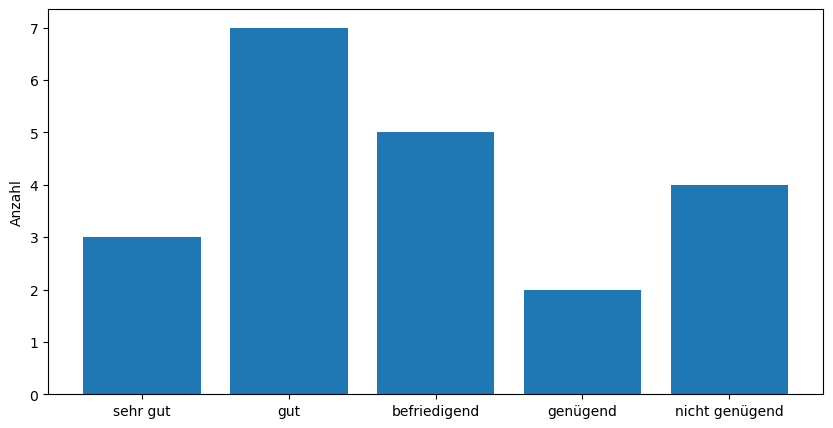

In [6]:
# bar plot:
plt.figure(figsize=(10,5))
plt.bar(Noten_Zahlen, Noten_Anzahlen, tick_label=Noten_Namen)
plt.ylabel('Anzahl');

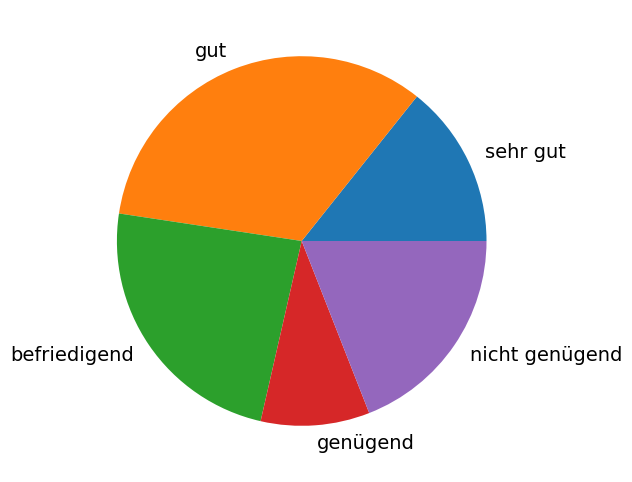

In [7]:
# pie plot:
plt.figure(figsize=(6,6))
plt.pie(Noten_Anzahlen, labels=Noten_Namen, 
        textprops={'fontsize':14});

In [8]:
# Für die Berechnung von Mean- und Std. sind Numpy-Arrays bequem:

Noten_Zahlen_array   = np.array(Noten_Zahlen) 
Noten_Anzahlen_array = np.array(Noten_Anzahlen)

# Gewichte (Wahrscheinlichkeiten): array mit Einträgen 3/21, 7/21, 5/21, etc.:
Gewichte = Noten_Anzahlen_array/Noten_Anzahlen_array.sum()

Mittelwert = np.sum(Noten_Zahlen_array*Gewichte)
print(f"{Mittelwert = :.2f}")

Standardabweichung = np.sqrt(
    np.sum( (Noten_Zahlen_array - Mittelwert)**2*Gewichte) )
print(f"Standardabweichung = {Standardabweichung:.2f}")

# Variante mit innerem Produkt:
Mittelwert = np.dot(Noten_Zahlen_array, Gewichte)
print(f"{Mittelwert = :.2f}")
Standardabweichung = np.sqrt(
    np.dot( (Noten_Zahlen_array - Mittelwert)**2, Gewichte) )
print(f"Standardabweichung = {Standardabweichung:.2f}")

Mittelwert = 2.86
Standardabweichung = 1.32
Mittelwert = 2.86
Standardabweichung = 1.32


## Aufgabe 3: Stochastik, Statistik, Plots

1. Verwenden Sie den numpy Befehl `random.normal`, um 1000 Zufallszahlen (Zufallsstichproben) aus einer normalen (Gaußschen) Verteilung mit Erwartungswert 2 und Standardabweichung 0.5 zu ziehen. 
2. Erstellen Sie ein Histogramm der Zufallszahlen. 
3. Erstellen Sie einen [Box-Plot](https://de.wikipedia.org/wiki/Box-Plot) der Zufallszahlen. 
4. Berechnen Sie den Median sowie das untere und das obere Quartil der Stichprobe.
5. Berechnen Sie den Mittelwert und die Standardabweichung der Stichprobe.

Sollten Ihnen die Begriffe dieser Aufgabe wie Histogramm, Median etc. nicht (mehr) geläufig sein, informieren Sie sich zuvor z. B. auf Wikipedia darüber.

### Lösung

In [9]:
mean = 2
std  = 0.5
N    = 1000

samples = np.random.normal(mean, std, N)

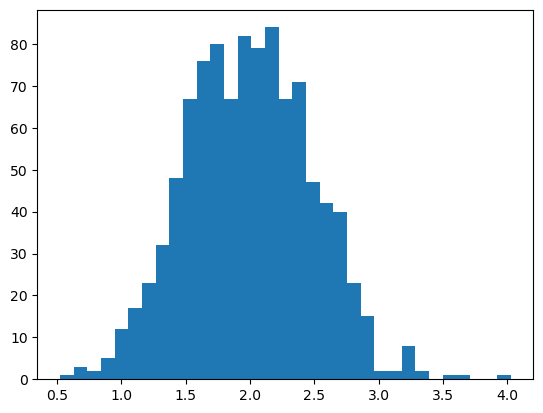

In [10]:
plt.hist(samples, bins=N//30);

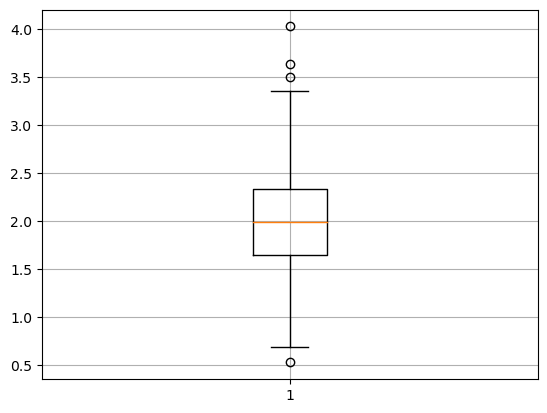

In [11]:
plt.boxplot(samples)
plt.grid(True)

In [12]:
print(f"Median = {np.median(samples):.5f}")
print(f"Unteres Quartil = {np.quantile(samples, 0.25):.5f}")
print(f"Oberes Quartil  = {np.quantile(samples, 0.75):.5f}")

Median = 1.98874
Unteres Quartil = 1.63980
Oberes Quartil  = 2.33231


In [13]:
print(f"Mittelwert = {samples.mean():.5f}")
print(f"Standardabweichung = {samples.std():.5f}")

Mittelwert = 1.99370
Standardabweichung = 0.48722


## Aufgabe 4: Ausgleichsgerade

Sie messen einen Ohmschen Widerstand aus. Für die Stromwerte $I = 0, 1, 2, 3, 4, 5$ A, die wir der Einfachheit halber als exakt annehmen, messen Sie die mit Messfehlern überlagerten Spannungswerte 
$U = 0.075, 3.749, 4.506, 10.040, 11.372, 12.623$ V.

1. Erstellen Sie einen Plot der Spannungswerte über den Stromwerten.
2. Das [Ohmsche Gesetz](https://de.wikipedia.org/wiki/Ohmsches_Gesetz) lautet $U = RI$. Um den Widerstand $R$ aus den Daten zu schätzen, fitten wir eine Gerade $U(I) = RI$ in die Daten. Dabei versuchen wir, die Summe der quadratischen $U$-Fehler $\sum_{k = 0}^5 (U_k - RI_k))^2$ zu minimieren. Schätzen Sie zuerst aus dem Plot eine Wert für $R$ und zeichnen Sie die Gerade $U(I) = RI$ für diesen Wert in den Graphen.
3. Plotten Sie für 50 $R$-Werte in der Umgebung Ihrer Schätzung die zugehörige Summen der quadratischen $U$-Fehler. Ist der Graph des Plots eine Parabel? Begründen Sie Ihre Antwort.
4. Bestimmen Sie jenen der 50 $R$-Werte, der die kleinste Summe an quadratischen $U$-Fehlern hat.

### Lösung

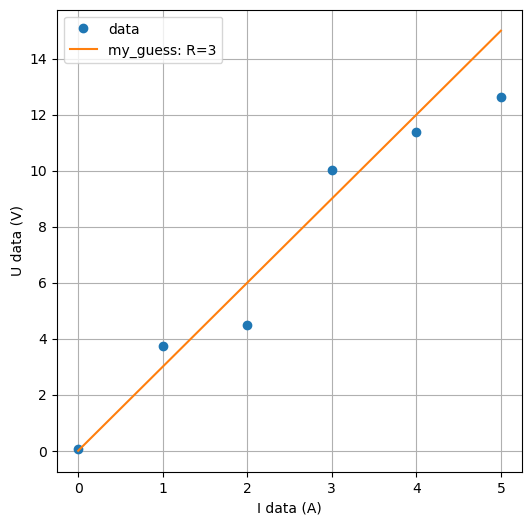

In [14]:
I_data = np.arange(0, 6)

if 0: # make synthetic data
    R_true = 3
    np.random.seed(4)
    U_data = R_true*(I_data + np.random.normal(0, 0.5, size=len(I_data)))
else: # use data from the specification of the exercise
    U_data = np.array([0.075, 3.749, 4.506, 10.040, 11.372, 12.623])

my_R = 3

plt.figure(figsize=(6,6))
plt.plot(I_data, U_data, 'o', label='data')
plt.plot(I_data, my_R*I_data, label='my_guess: R=3')
plt.xlabel('I data (A)')
plt.ylabel('U data (V)')
plt.legend()
plt.grid(True)

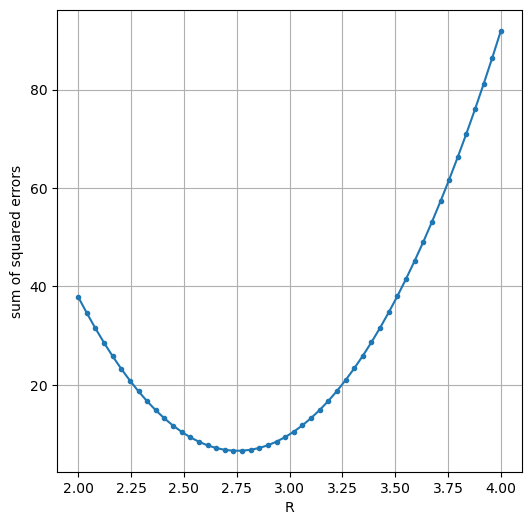

In [15]:
my_R_values = np.linspace(my_R - 1, my_R + 1, num=50)

def sse(R):
    """sum of squared errors"""
    return np.sum( (U_data - R*I_data)**2 )

my_sse_values = []
for R in my_R_values:
    my_sse_values.append(sse(R))

plt.figure(figsize=(6,6))
plt.plot(my_R_values, my_sse_values, '.-')
plt.xlabel('R')
plt.ylabel('sum of squared errors')
plt.grid(True)

In [16]:
min_sse_value = max(my_sse_values)
min_index = None
for k in range(len(my_sse_values)):
    if my_sse_values[k] < min_sse_value:
        min_index = k
        min_sse_value = my_sse_values[k]
print(f"Min. SSE R value = {my_R_values[min_index]:.2f} Ohm.")

Min. SSE R value = 2.73 Ohm.


## Aufgabe 5: Random Walk

Ein [Random Walk](https://de.wikipedia.org/wiki/Random_Walk) ist eine Bewegung, bei der die einzelnen Schritte zufällig erfolgen. Wir simulieren auf folgende Weise einen Random Walk in der Ebene:

- Startpunkt ist der Ursprung $(0,0)$.
- Ein Schritt hat die Länge 0.1.
- Vor jedem Schritt wird zufällig entschieden, ob der Schritt in Richtung Norden, Osten, Süden oder Westen gegangen wird. 
- Die jede Richtung hat dieselbe Wahrscheinlichkeit.

Verwenden Sie z. B. die numpy-Funktion `random.randint`, um zufällige Richtungsentscheidungen zu generieren, und plotten Sie den Weg von 1000 Schritten.

### Lösung

In [17]:
N = 1000  # Anzahl Schritte

walk = np.zeros((2, N))

norden = np.array([ 0,  1])
osten  = np.array([ 1,  0])
sueden = np.array([ 0, -1])
westen = np.array([-1,  0])

for n in range(1, N):
    step = np.random.randint(0, 4)
    if step == 0: # Norden
        walk[:,n] =  walk[:,n - 1] + norden
    elif step == 1: # Osten
        walk[:,n] =  walk[:,n - 1] + osten
    elif step == 2: # Sueden
        walk[:,n] =  walk[:,n - 1] + sueden
    elif step == 3: # Westen
        walk[:,n] =  walk[:,n - 1] + westen

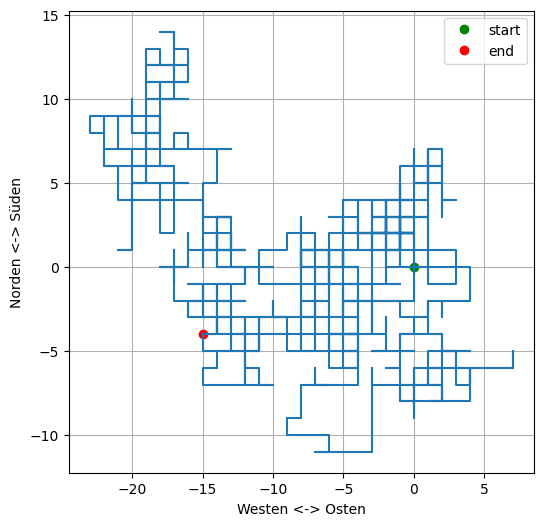

In [18]:
plt.figure(figsize=(6,6))
plt.plot(walk[0, 0], walk[1, 0], 'og', label='start')
plt.plot(walk[0,-1], walk[1,-1], 'or', label='end')
plt.plot(walk[0,:], walk[1,:])
plt.xlabel('Westen <-> Osten')
plt.ylabel('Norden <-> Süden')
plt.legend()
plt.grid(True)

## Aufgabe 6: Fläche eines Polygons

Eines der wichtigsten mathematischen Probleme bestand für lange Zeiten darin, die Fläche eines [Polygons](https://de.wikipedia.org/wiki/Polygon) zu finden, insbesondere weil Grundstücke oft die Form von Polygonen haben und es notwendig war, Steuern dafür zu zahlen. Hier ein Beispiel eines Polygons:

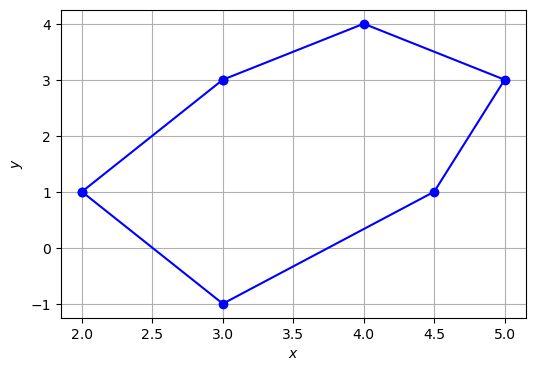

In [19]:
# x- und y-Koordinaten der Eckpunkte des Polygons,
# entweder im oder gegen den Uhrzeigersinn nummeriert:
x = [2,  3, 4.5, 5, 4, 3]
y = [1, -1, 1  , 3, 4, 3]

plt.figure(figsize=(6,4))
plt.plot(x, y, 'o-b')
plt.plot([x[-1], x[0]], 
         [y[-1], y[0]], 'o-b')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid(True)

Die Ecken haben die Koordinaten $(x_1, y_1)$, $(x_2, y_2)$, ..., $(x_n, y_n)$, entweder im oder gegen den Uhrzeigersinn nummeriert. Die Fläche $A$ des Polygons kann auf folgende Weise berechnet werden:
 
$$A = \frac{1}{2}\left\vert 
(x_1 y_2 + x_2 y_3 + \ldots + x_{n-1}y_n + x_n y_1) - 
(y_1 x_2 + y_2 x_3 + \ldots + y_{n-1}x_n + y_n x_1)
\right\vert$$

1. Schreiben Sie eine Funktion `polyarea(x,y)`, die als Argumente die zwei Koordinaten-Arrays oder -Listen mit den Eckpunkten nimmt und den Flächeninhalt zurückgibt. 
2. Testen Sie die Funktion mit einem Dreieck und einem Viereck, bei denen Sie die Fläche mit Standardformeln berechnen können.

*Hinweis:* Da Python-Listen und -Arrays 0 als ersten Index haben, ist es ratsam, obige mathematische Formel mit Koordinaten $x_0, x_1, \ldots, x_{n-1}$ und $y_0, y_1, \ldots, y_{n-1}$ umzuschreiben.

### Lösung

In [20]:
def polyarea(x, y):
    """
    computes the area of a polygon from vertex coordinates
    """
    n = len(x)
    # next we may initialize area with those terms in the
    # sum that does not follow the "increasing index pattern"
    area = x[n-1]*y[0] - y[n-1]*x[0]  
    for i in range(0, n-1, 1):
        area += x[i]*y[i+1] - y[i]*x[i+1]
    return 0.5*np.abs(area)

In [21]:
def polyplot(x,y):
    plt.figure(figsize=(6,4))
    plt.plot(x, y, 'o-b')
    plt.plot([x[-1], x[0]], 
             [y[-1], y[0]], 'o-b')
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.grid(True)

Area triangle (true value = 2): 2.0


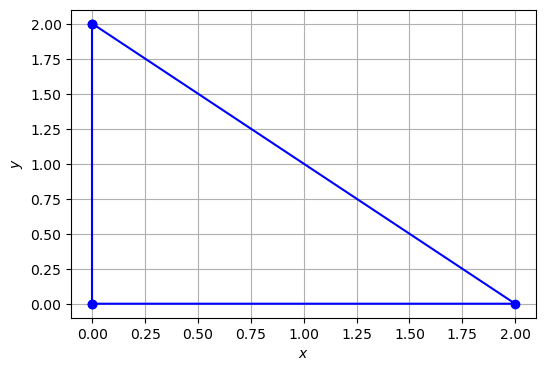

In [22]:
# Dreieck
x = [0, 2, 0]
y = [0, 0, 2]

polyplot(x,y)
print(f"Area triangle (true value = 2): {polyarea(x, y)}")

Area quadrilateral (true value = 4): 4.0


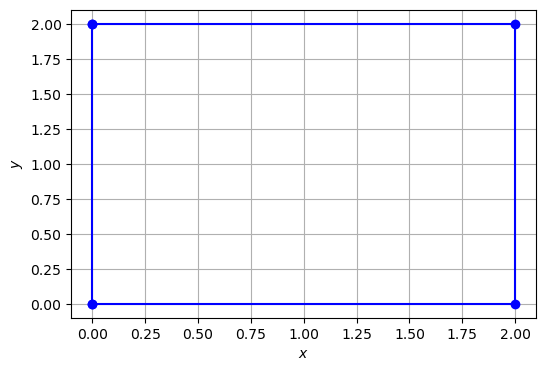

In [23]:
# Viereck:
x = [0, 2, 2, 0]
y = [0, 0, 2, 2]

polyplot(x,y)
print(f"Area quadrilateral (true value = 4): {polyarea(x, y)}")

## Aufgabe 7: Ableitungsautomat

Schreiben Sie ein Python-Programm, das bei der Eingabe einer der folgenden Funktion als Zeichenkette (String) die Ableitung dieser Funktion als Zeichenkette ausgibt: $\cos(x)$, $\sin(x)$, $\exp(x)$, $\ln(x)$. Das Programm soll solange neue Eingaben beantworten, bis man `Ende` eintippt. Zudem soll es eine sinnvolle Ausgabe erstellen, wenn die Eingabe eines unkekannten Werts erfolgt.

*Hinweise:* Verwenden Sie für die Eingabe die Funktion `input` und als Datenstruktur ein Dictionary.

### Lösung

*Quelle:* Steinkamp, Veit (2020): Der Python-Kurs für Ingenieure und Naturwissenschaftler: Mit vielen Praxislösungen. Rheinwerk Computing. Seite 91.

```python
# dictionary of derivatives:
dict_deriv = {"cos(x)":"-sin(x)",
              "sin(x)":"cos(x)",
              "exp(x)":"exp(x)",
              "ln(x)" :"1/x"}

str_in = input("Geben Sie eine Funktion oder 'Ende' ein:")
while str_in != "Ende":
    # print(f"Eingabe = {str_in}")
    if str_in in dict_deriv.keys():
        print(f"Die Funktion {str_in} hat die Ableitung {dict_deriv[str_in]}.")
    else:
        print("Funktion nicht enthalten!")
    str_in = input("Geben Sie eine Funktion oder 'Ende' ein:")
```

## Aufgabe 8: Geburtstage

Sehr bekannt ist das folgende Problem: Wenn sich $n$ Personen in einem Raum befinden, wie groß ist die Wahrscheinlichkeit, dass mindestens zwei von ihnen am selben Tag Geburtstag haben? Die Wahrscheinlichkeit dazu kann durch die folgenden Vorschrift berechnet werden:

$$ p_n = 1 - \frac{365\cdot364 \cdots (365 - n + 1)}{365^n}$$

Schreiben Sie eine Funktion, die die Wahrscheinlichkeit als Funktion von $n$ berechnet. Berechnen Sie dann die Wahrscheinlichkeiten für $n = 2, \ldots, 55$ und stellen Sie diese in einer Grafik dar. Interpretieren Sie die Grafik?

*Hinweise:* Verwenden Sie die Funktion `factorial` aus dem Paket `math`.

### Lösung

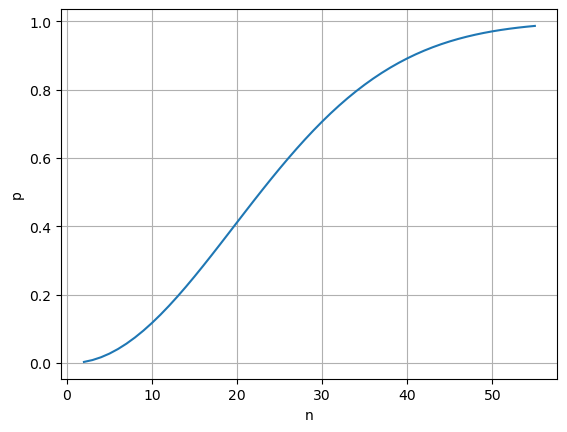

In [27]:
def p(n):
    return 1 - math.factorial(365)/(math.factorial(365 - n)*365**n )

n_values = range(2, 56)
prob_values = []

for n in n_values:
    prob_values.append(p(n))
    
plt.plot(n_values, prob_values)
plt.xlabel("n")
plt.ylabel("p")
plt.grid(True)